# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.2.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [14]:
harry_potter = movies[movies.title.str.contains('Harry Potter', case=False)].sort_values('year', ascending=False)
harry_potter

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [16]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [17]:
len(movies[(movies.year >= 200) & (movies.year <= 2018)])

243513

### Section I - Q4: How many movies are titled "Hamlet"?

In [18]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [38]:
hamlet = movies[(movies.title == 'Hamlet') & (movies.year >= 2000)].sort_values('year')
hamlet

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [37]:
inception_cast = cast[(cast.title == 'Inception') & (cast['n'].isnull())]
inception_cast


,title,year,name,type,character,n
98153,Inception,2010,Michael (III) August,actor,LAX Passenger,NaN
197877,Inception,2010,Ken Bhan,actor,Mombasan Gambler,NaN
374661,Inception,2010,John Ceallach,actor,LAX Passenger,NaN
497161,Inception,2010,Garvin Cross,actor,Snow Commander,NaN
684098,Inception,2010,Seve Esposito,actor,Italian Gambler,NaN
690634,Inception,2010,Marcus (II) Everett,actor,Stock Broker,NaN
707642,Inception,2010,Zachary Christopher Fay,actor,Extra,NaN
836295,Inception,2010,Daniel Girondeaud,actor,Bridge Sub Con,NaN
1006636,Inception,2010,Andrew Hoagland,actor,Pedestrian,NaN
1095095,Inception,2010,Charles Jarrell,actor,Hotel Guest,NaN


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [36]:
inception_cast = cast[(cast.title == 'Inception') & (cast['n'].notna())]
inception_cast

,title,year,name,type,character,n
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
260128,Inception,2010,Virgile Bramly,actor,Bridge Sub Con,29.0
326745,Inception,2010,Michael Caine,actor,Miles,11.0
333415,Inception,2010,Earl Cameron,actor,Elderly Bald Man,20.0
433867,Inception,2010,Nicolas Clerc,actor,Bridge Sub Con,26.0
444385,Inception,2010,Adam (IV) Cole,actor,Bar Sub Con,34.0
517227,Inception,2010,Jean-Michel Dagory,actor,Bridge Sub Con,30.0
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
709436,Inception,2010,Russ Fega,actor,Cab Driver,23.0


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [39]:
inception_cast = cast[(cast.title == 'Inception') & (cast['n'].notnull())].sort_values('n')
inception_cast

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [43]:
# (A)
albus_d_movies = cast[(cast['character'] == 'Albus Dumbledore')].title
albus_d_movies

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [48]:
# (B)
albus_d_actor = cast[(cast['character'] == 'Albus Dumbledore')].name.drop_duplicates()
albus_d_actor

704984            Dane Farwell
792421          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [54]:
# (A)
keanu_roles = cast[cast.name == 'Keanu Reeves'].sort_values('character').character.drop_duplicates()
keanu_roles

1892388              Alex Wyler
1892343              Bob Arctor
1892349       Chevalier Danceny
1892396            Chris Nadeau
1892375          Chris Townsend
1892358           Conor O'Neill
1892353        Detective Galban
1892382    Detective Tom Ludlow
1892351                 Dogstar
1892371                Don John
1892368             Donaka Mark
1892387        Donnie Barksdale
1892401             Dr. Beckham
1892347        Eddie Kasalivich
1892366                    Evan
1892398                 Griffin
1892393                    Hank
1892389                   Harry
1892403                  Heaver
1892359             Henry Torne
1892370                 Himself
1892380             Jack Traven
1892354           Jjaks Clayton
1892357                    John
1892348        John Constantine
1892363               John Wick
1892364         Johnny Mnemonic
1892376             Johnny Utah
1892350         Jonathan Harker
1892352           Julian Gitche
1892379           Julian Mercer
1892342 

In [57]:
# (B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.
keanu_leading = cast[(cast.name == 'Keanu Reeves') & (cast.year >= 1999) & (cast.n == 1)].sort_values('year')
keanu_leading

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [70]:
# (A) List the total number of actor and actress roles available from 1950 - 1960

total_roles = cast[(cast.year >= 1950) & (cast.year <= 1960) & (cast.n.notnull())]
len(total_roles)

actor      2532681
actress    1253495
Name: type, dtype: int64

In [65]:
# (B) List the total number of actor and actress roles available from 2007 - 2017
total_roles = cast[(cast.year >= 2007) & (cast.year <= 2017) & (cast.n.notnull())]
len(total_roles)

736363

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [73]:
# (A) List the total number of leading roles available from 2000 to present

total_leads = cast[(cast.year >= 2000) & (cast.n == 1)]
len(total_leads)

60568

In [77]:
# (B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

total_non_leads = cast[(cast.year >= 2000) & (cast.n > 1)]
len(total_non_leads)

1001710

In [78]:
# (C) List the total number of support\extra-credit roles available from 2000 - present
total_supporting = cast[(cast.year >= 2000) & (cast.n.isnull())]
len(total_supporting)

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [79]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
The Outsider            12
Temptation              12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

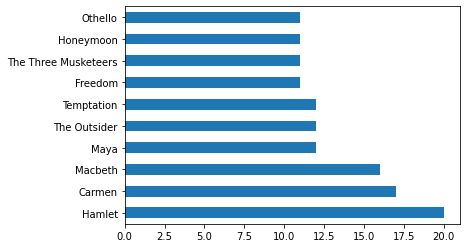

In [80]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

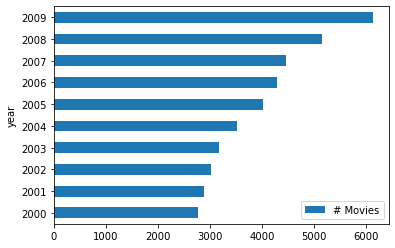

In [95]:
most_releases_2000s = movies[(movies.year >= 2000) & (movies.year <= 2009)].groupby('year').count()
most_releases_2000s
most_releases_2000s.plot(kind='barh', ylabel='Year')
plt.legend(['# Movies'])

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:ylabel='decade'>

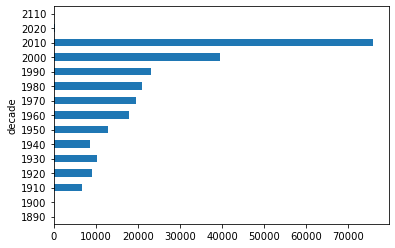

In [112]:
from math import floor

movies['decade'] = (movies['year'] / 10).apply(floor) * 10

movies_by_decade = movies.sort_values('decade').groupby('decade').count()['title']
movies_by_decade.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [125]:
# (A) What are the top 10 most common character names in movie history?
top_characters = cast.groupby('character').count().sort_values('title', ascending=False).title
top_characters.head(10)


character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: title, dtype: int64

In [135]:
# (B) Who are the top 10 people most often credited as "Herself" in movie history?

top_herself = cast[(cast.character == 'Herself')].groupby('name').count().sort_values('title', ascending=False).title
top_herself.head(10)

name
Queen Elizabeth II        12
Joyce Brothers             9
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Hillary Clinton            8
Margaret Thatcher          8
In?s J. Southern           6
Marta Berrocal             6
Oprah Winfrey              6
Marilyn Monroe             6
Name: title, dtype: int64

In [134]:
# (C) Who are the top 10 people most often credited as "Himself" in movie history?
top_herself = cast[(cast.character == 'Himself')].groupby('name').count().sort_values('title', ascending=False).title
top_herself.head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: title, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [140]:
# (A) What are the top 10 most frequent roles that start with the word "Zombie"?

top_zombie = cast[(cast.character.str.startswith('Zombie'))].groupby('character').count().sort_values('title', ascending=False).title
top_zombie.head(10)

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: title, dtype: int64

In [141]:
# (B) What are the top 10 most frequent roles that start with the word "Police"?
top_police = cast[(cast.character.str.startswith('Police'))].groupby('character').count().sort_values('title', ascending=False).title
top_police.head(10)

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: title, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:title={'center':'Keanu Reaves Roles Per Year'}, ylabel='year'>

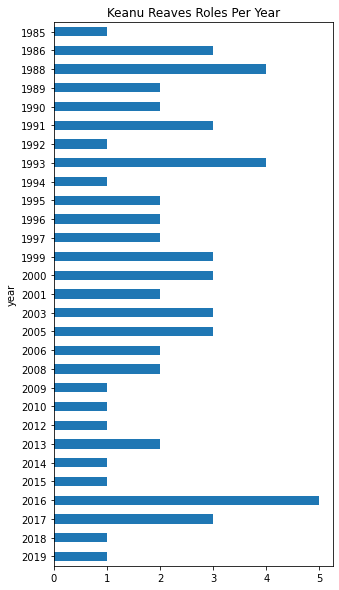

In [171]:
keanu_roles_by_year = cast[(cast.name == 'Keanu Reeves')].groupby('year').count().sort_values('year', ascending=False).title
keanu_roles_by_year.plot(kind='barh', figsize=(5, 10), title='Keanu Reaves Roles Per Year')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:title={'center':'Keanu Reaves Cast Position'}, xlabel='year'>

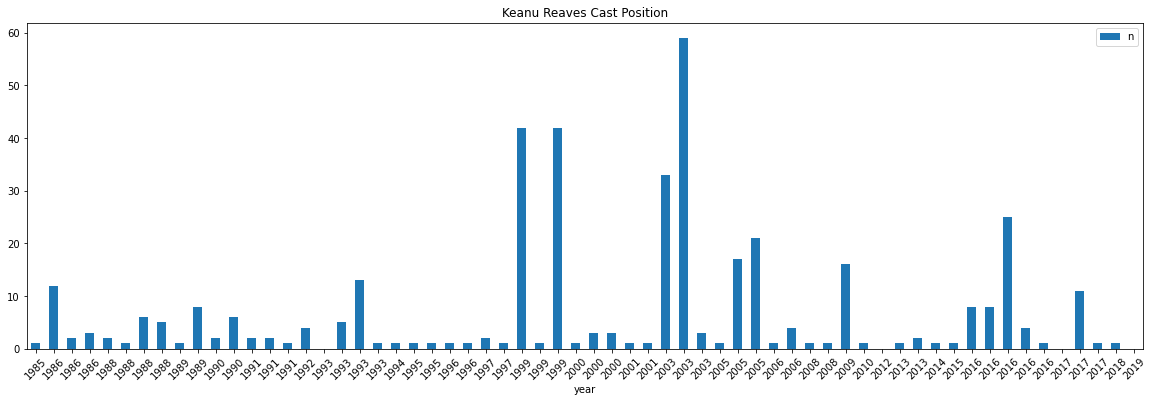

In [159]:
keanu_position = cast[(cast.name == 'Keanu Reeves')].sort_values('year')
keanu_position.plot(kind='bar', x='year', y='n', rot=45, figsize=(20, 6), title='Keanu Reaves Cast Position')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:ylabel='decade'>

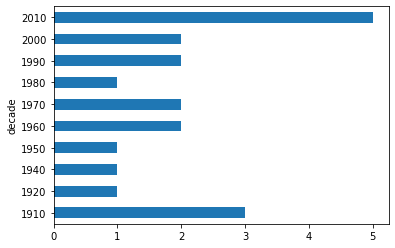

In [165]:
hamlet_by_decade = movies[(movies.title == 'Hamlet')].groupby('decade').count().title
hamlet_by_decade.plot(kind='barh')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [176]:
# (A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?
leading_roles_1960s = cast[(cast.year >= 1960) & (cast.year <= 1969) & (cast.n == 1)]
len(leading_roles_1960s)

11823

In [178]:
# (B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?
leading_roles_2000s = cast[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n == 1)]
len(leading_roles_2000s)

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [208]:
frank_oz_roles_by_title = cast[(cast.name == 'Frank Oz')].groupby(['year', 'title']).character.count()
frank_oz_multi_role = frank_oz_roles_by_title[frank_oz_roles_by_title > 1]
frank_oz_multi_role.sort_index()

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
Name: character, dtype: int64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [206]:
frank_oz_roles = cast[(cast.name == 'Frank Oz')].character.value_counts()
frank_oz_roles[frank_oz_roles >= 2].sort_values(ascending=False)

Miss Piggy        6
Yoda              6
Animal            6
Sam the Eagle     5
Cookie Monster    5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

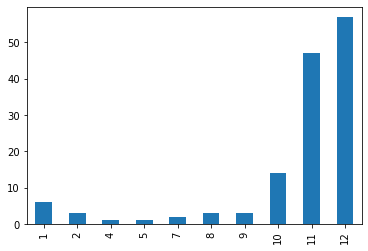

In [202]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

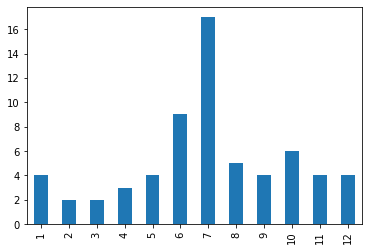

In [205]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

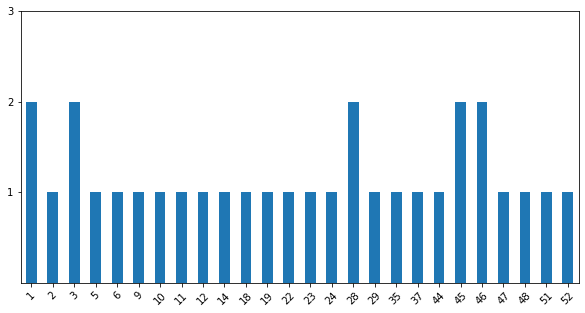

In [219]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar', rot=45, figsize=(10, 5), yticks=(1,2,3))


### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [265]:
keanu_leads = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1)].set_index(['title', 'year'])
usa_releases = release_dates[release_dates.country == 'USA'].set_index(['title', 'year'])
keanu_lead_releases = pd.merge(keanu_leads, usa_releases, right_index=True, left_index=True).sort_values('date')
keanu_lead_releases

,,name,type,character,n,country,date
title,year,,,,,,
The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:title={'center':'Keanu Reeves Month Releases'}, xlabel='month'>

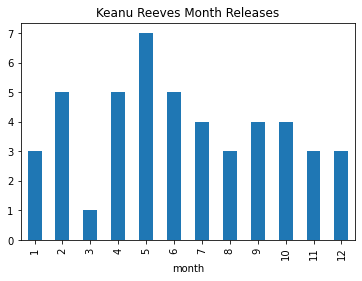

In [277]:
keanu_movies = cast[(cast.name == 'Keanu Reeves')].set_index(['title', 'year'])
keanu_releases = pd.merge(keanu_movies, usa_releases, right_index=True, left_index=True)
keanu_releases['month'] = keanu_releases.date.dt.month
keanu_release_months = keanu_releases.groupby('month').name.count()

keanu_release_months.plot(kind='bar', title='Keanu Reeves Month Releases')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:title={'center':'Ian McKellen Releases by Year'}, xlabel='year'>

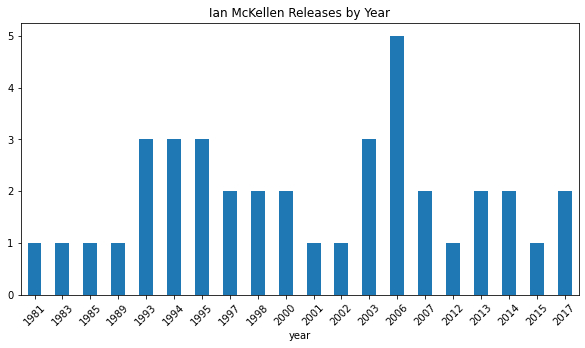

In [278]:
ian_movies = cast[(cast.name == 'Ian McKellen')].set_index(['title', 'year'])
ian_releases = pd.merge(ian_movies, usa_releases, right_index=True, left_index=True)
ian_release_year = ian_releases.groupby('year').name.count()

ian_release_year.plot(kind='bar', title='Ian McKellen Releases by Year', rot=45, figsize=(10, 5))